In [1]:
import numpy as np
import pandas as pd
import math

# Load dataset from CSV file
file_path = "/content/sample_data/weather.csv"
df = pd.read_csv(file_path)

# Function to calculate entropy
def entropy(target_col):
    values, counts = np.unique(target_col, return_counts=True)
    entropy = -sum((counts[i] / sum(counts)) * math.log2(counts[i] / sum(counts)) for i in range(len(values)))
    return entropy

# Function to calculate information gain
def info_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# Function to build ID3 decision tree
def id3(data, features, target):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    if len(features) == 0:
        return data[target].mode()[0]
    best_feature = max(features, key=lambda f: info_gain(data, f, target))
    tree = {best_feature: {}}
    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value]
        subtree = id3(subset, [f for f in features if f != best_feature], target)
        tree[best_feature][value] = subtree
    return tree

# Running the ID3 algorithm
features = list(df.columns[:-1])
target = df.columns[-1]  # Assuming last column is the target variable
decision_tree = id3(df, features, target)

import pprint
pprint.pprint(decision_tree)


{'id': {1: 'no',
        2: 'no',
        3: 'yes',
        4: 'yes',
        5: 'yes',
        6: 'no',
        7: 'yes',
        8: 'no',
        9: 'yes',
        10: 'yes',
        11: 'yes',
        12: 'yes',
        13: 'yes',
        14: 'no'}}


In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Load dataset (update the file path accordingly)
file_path = input("Enter the dataset file path: ")
df = pd.read_csv(file_path)

# 1. Data Cleaning
print("Checking for missing values:\n", df.isnull().sum())

# Handling missing values
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")

# Impute missing values and update the DataFrame
df[df.select_dtypes(include=[np.number]).columns] = imputer_mean.fit_transform(df.select_dtypes(include=[np.number])) # Correctly assign the imputed values back to the DataFrame


# 2. Handling Categorical Data
cat_columns = df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

if len(cat_columns) > 0:
    df[cat_columns] = ordinal_encoder.fit_transform(df[cat_columns])
    onehot_encoded = onehot_encoder.fit_transform(df[cat_columns])
    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(cat_columns))
    df = df.drop(columns=cat_columns)
    df = pd.concat([df, onehot_df], axis=1)

# 3. Detecting Outliers
# Boxplot
plt.boxplot(df.select_dtypes(include=[np.number]), vert=False)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Z-score method
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    return [i for i in data if abs((i - mean) / std) > thres]

for col in df.select_dtypes(include=[np.number]):
    print(f"Outliers in {col}: ", detect_outliers_zscore(df[col]))

# 4. Feature Scaling
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df[df.select_dtypes(include=[np.number]).columns] = scaler_standard.fit_transform(df.select_dtypes(include=[np.number]))

# 5. Save Processed Data
df.to_csv("processed_dataset.csv", index=False)
print("Data preprocessing completed and saved as 'processed_dataset.csv'")


Enter the dataset file path: /content/sample_data/california_housing_train.csv
Checking for missing values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

Enter the dataset file path: /content/sample_data/california_housing_train.csv
Checking for missing values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


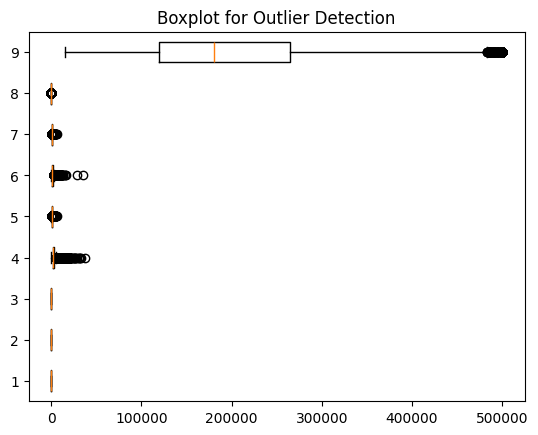

Outliers in longitude:  []
Outliers in latitude:  []
Outliers in housing_median_age:  []
Outliers in total_rooms:  [10377.0, 9444.0, 12991.0, 19107.0, 12327.0, 12557.0, 17579.0, 11836.0, 12509.0, 11115.0, 11659.0, 16921.0, 10105.0, 9425.0, 10227.0, 10077.0, 9374.0, 9975.0, 12480.0, 10886.0, 12342.0, 13559.0, 14934.0, 10997.0, 12517.0, 11391.0, 9724.0, 16450.0, 10352.0, 9601.0, 16148.0, 10968.0, 11544.0, 15401.0, 9992.0, 13814.0, 9518.0, 9911.0, 17466.0, 14944.0, 13703.0, 10665.0, 15502.0, 30401.0, 9302.0, 15029.0, 9285.0, 20391.0, 15695.0, 19001.0, 21060.0, 9419.0, 10394.0, 18356.0, 10002.0, 12526.0, 16884.0, 9911.0, 13195.0, 11775.0, 13724.0, 13096.0, 9812.0, 9859.0, 26322.0, 20908.0, 18767.0, 16010.0, 14960.0, 20944.0, 13245.0, 12837.0, 10923.0, 11827.0, 17286.0, 11810.0, 9269.0, 16533.0, 9286.0, 10804.0, 10145.0, 12156.0, 11587.0, 10072.0, 25135.0, 14281.0, 9966.0, 9759.0, 12870.0, 10565.0, 12106.0, 10395.0, 10235.0, 11965.0, 13562.0, 17978.0, 17577.0, 11818.0, 16431.0, 9467.0, 2026

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Load dataset (update the file path accordingly)
file_path = input("Enter the dataset file path: ")
df = pd.read_csv(file_path)

# 1. Data Cleaning
print("Checking for missing values:\n", df.isnull().sum())

# Handling missing values
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")

# Impute missing values and update the DataFrame
df[df.select_dtypes(include=[np.number]).columns] = imputer_mean.fit_transform(df.select_dtypes(include=[np.number])) # Correctly assign the imputed values back to the DataFrame


# 2. Handling Categorical Data
cat_columns = df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

if len(cat_columns) > 0:
    df[cat_columns] = ordinal_encoder.fit_transform(df[cat_columns])
    onehot_encoded = onehot_encoder.fit_transform(df[cat_columns])
    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(cat_columns))
    df = df.drop(columns=cat_columns)
    df = pd.concat([df, onehot_df], axis=1)

# 3. Detecting Outliers
# Boxplot
plt.boxplot(df.select_dtypes(include=[np.number]), vert=False)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Z-score method
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    return [i for i in data if abs((i - mean) / std) > thres]

for col in df.select_dtypes(include=[np.number]):
    print(f"Outliers in {col}: ", detect_outliers_zscore(df[col]))

# 4. Feature Scaling
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df[df.select_dtypes(include=[np.number]).columns] = scaler_standard.fit_transform(df.select_dtypes(include=[np.number]))

# 5. Save Processed Data
df.to_csv("processed_dataset.csv", index=False)
print("Data preprocessing completed and saved as 'processed_dataset.csv'")


Enter the dataset file path: /content/sample_data/california_housing_train.csv
Checking for missing values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


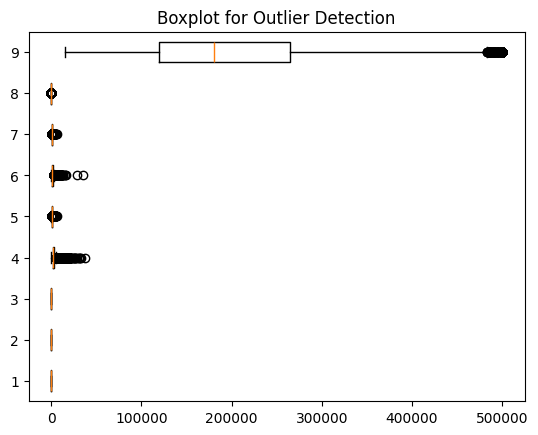

Outliers in longitude:  []
Outliers in latitude:  []
Outliers in housing_median_age:  []
Outliers in total_rooms:  [10377.0, 9444.0, 12991.0, 19107.0, 12327.0, 12557.0, 17579.0, 11836.0, 12509.0, 11115.0, 11659.0, 16921.0, 10105.0, 9425.0, 10227.0, 10077.0, 9374.0, 9975.0, 12480.0, 10886.0, 12342.0, 13559.0, 14934.0, 10997.0, 12517.0, 11391.0, 9724.0, 16450.0, 10352.0, 9601.0, 16148.0, 10968.0, 11544.0, 15401.0, 9992.0, 13814.0, 9518.0, 9911.0, 17466.0, 14944.0, 13703.0, 10665.0, 15502.0, 30401.0, 9302.0, 15029.0, 9285.0, 20391.0, 15695.0, 19001.0, 21060.0, 9419.0, 10394.0, 18356.0, 10002.0, 12526.0, 16884.0, 9911.0, 13195.0, 11775.0, 13724.0, 13096.0, 9812.0, 9859.0, 26322.0, 20908.0, 18767.0, 16010.0, 14960.0, 20944.0, 13245.0, 12837.0, 10923.0, 11827.0, 17286.0, 11810.0, 9269.0, 16533.0, 9286.0, 10804.0, 10145.0, 12156.0, 11587.0, 10072.0, 25135.0, 14281.0, 9966.0, 9759.0, 12870.0, 10565.0, 12106.0, 10395.0, 10235.0, 11965.0, 13562.0, 17978.0, 17577.0, 11818.0, 16431.0, 9467.0, 2026

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Load dataset (update the file path accordingly)
file_path = input("Enter the dataset file path: ")
df = pd.read_csv(file_path)

# 1. Data Cleaning
print("Checking for missing values:\n", df.isnull().sum())

# Handling missing values
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")

# Impute missing values and update the DataFrame
df[df.select_dtypes(include=[np.number]).columns] = imputer_mean.fit_transform(df.select_dtypes(include=[np.number])) # Correctly assign the imputed values back to the DataFrame


# 2. Handling Categorical Data
cat_columns = df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

if len(cat_columns) > 0:
    df[cat_columns] = ordinal_encoder.fit_transform(df[cat_columns])
    onehot_encoded = onehot_encoder.fit_transform(df[cat_columns])
    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(cat_columns))
    df = df.drop(columns=cat_columns)
    df = pd.concat([df, onehot_df], axis=1)

# 3. Detecting Outliers
# Boxplot
plt.boxplot(df.select_dtypes(include=[np.number]), vert=False)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Z-score method
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    return [i for i in data if abs((i - mean) / std) > thres]

for col in df.select_dtypes(include=[np.number]):
    print(f"Outliers in {col}: ", detect_outliers_zscore(df[col]))

# 4. Feature Scaling
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df[df.select_dtypes(include=[np.number]).columns] = scaler_standard.fit_transform(df.select_dtypes(include=[np.number]))

print("Data after scaling:", df.head())

# 5. Save Processed Data
df.to_csv("processed_dataset.csv", index=False)
print("Data preprocessing completed and saved as 'processed_dataset.csv'")
